# Spaceship Titanic - Kaggle competition

https://www.kaggle.com/competitions/spaceship-titanic

This notebook serves as an introduction for the class about supervised learning.
Students are introduced to overfitting. They build a Scikit-Learn pipeline and fit a simple DecisionTreeClassifier on the Spaceship Titanic dataset. The model is evaluated with a kaggle submission.

In [1]:
# pip install Pandas

We load the train data. The PassengerId column is used as the index of the dataframe

In [2]:
import pandas as pd
import numpy as np

train = pd.read_csv("Data/train.csv", index_col= "PassengerId")
train

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 891.4+ KB


## Preprocessing Pipeline

We identified null values in all columns. We will clean these by type.

In [4]:
train.isna().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [5]:
# pip install scikit-learn

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

train = pd.read_csv("Data/train.csv", index_col= "PassengerId")

# Step 1: Define transformers for different column types
numerical_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="mean"))]
)

categorical_cols = ['HomePlanet', 'Destination', 'VIP', 'CryoSleep']
categorical_transformer = Pipeline(
    steps=[
        ('encoder', OneHotEncoder())
])

# Step 2: Create a ColumnTransformer that applies the transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='drop' 
)

# Step 3: Assemble the preprocessing pipeline
preprocessing_pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

# Fit and transform the DataFrame
X_train = preprocessing_pipeline.fit_transform(train)

preprocessing_pipeline


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['Age', 'RoomService',
                                                   'FoodCourt', 'ShoppingMall',
                                                   'Spa', 'VRDeck']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['HomePlanet', 'Destination',
                                                   'VIP', 'CryoSleep'])]))])

In [7]:
# Converting back to Pandas DataFrame
onehot_encoder_feature_names = list(preprocessing_pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['encoder'].get_feature_names_out())
column_order =  numerical_cols + onehot_encoder_feature_names

# Show the cleaned DataFrame
pd.DataFrame(X_train, columns=column_order, index=train.index)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_nan,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_nan,VIP_False,VIP_True,VIP_nan,CryoSleep_False,CryoSleep_True,CryoSleep_nan
PassengerId,,,,,,,,,,,,,,,,,,,,
0001_01,39.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
0002_01,24.0,109.0,9.0,25.0,549.0,44.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
0003_01,58.0,43.0,3576.0,0.0,6715.0,49.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
0003_02,33.0,0.0,1283.0,371.0,3329.0,193.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
0004_01,16.0,303.0,70.0,151.0,565.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,41.0,0.0,6819.0,0.0,1643.0,74.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
9278_01,18.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9279_01,26.0,0.0,0.0,1872.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## Finding the Optimal Decision Tree Classifier 

We extend the pipeline with a decision tree classifier to predict the Transported variable.

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

X = train.drop('Transported', axis=1)
y = train['Transported']

# Initialize a list to store results
results = []

for k in range(1, 41):  # Iterating from 1 to 40
    hyperparams = {
        'criterion': 'entropy',   # Function to measure the quality of a split
        'max_depth': k,           # k as the max_depth to prevent overfitting
        'random_state': 42        # Ensures reproducibility of the results
    }

    # Update the model pipeline with the new DecisionTreeClassifier parameters
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', DecisionTreeClassifier(**hyperparams))
    ])
    
    # Compute accuracy using 5-fold cross-validation
    cross_val = cross_val_score(model_pipeline, X, y, cv=5, scoring='accuracy', n_jobs=-1).mean()

    # /!\ THIS IS NOT SOMETHING YOU SHOULD DO IRL /!\
    model_pipeline.fit(X, y)
    accuracy = model_pipeline.score(X, y)

    # Append the results to the list
    results.append({'k': k, 'cv': cross_val, 'train': accuracy})

# Create the DataFrame from the results list
accuracy_dt_df = pd.DataFrame(results)

# Display the DataFrame
print(accuracy_dt_df)

     k        cv     train
0    1  0.718281  0.718279
1    2  0.718281  0.718279
2    3  0.718281  0.718279
3    4  0.759925  0.764178
4    5  0.763260  0.771425
5    6  0.773037  0.788450
6    7  0.781896  0.800874
7    8  0.783621  0.805706
8    9  0.779135  0.814103
9   10  0.778215  0.820430
10  11  0.775684  0.828023
11  12  0.774303  0.836420
12  13  0.770162  0.844588
13  14  0.761879  0.852295
14  15  0.756587  0.862533
15  16  0.751756  0.873691
16  17  0.747614  0.881974
17  18  0.746808  0.890602
18  19  0.744853  0.898999
19  20  0.742092  0.904176
20  21  0.741056  0.910848
21  22  0.737375  0.916715
22  23  0.738181  0.922236
23  24  0.735649  0.926378
24  25  0.736801  0.929138
25  26  0.737490  0.930979
26  27  0.735535  0.933165
27  28  0.736570  0.934890
28  29  0.734614  0.935810
29  30  0.736455  0.937881
30  31  0.735535  0.937651
31  32  0.735305  0.939952
32  33  0.737145  0.939146
33  34  0.739791  0.939492
34  35  0.738411  0.940527
35  36  0.739561  0.940757
3

### Overfitting visualisation

We use matplotlib library to plot the accuracy_df.

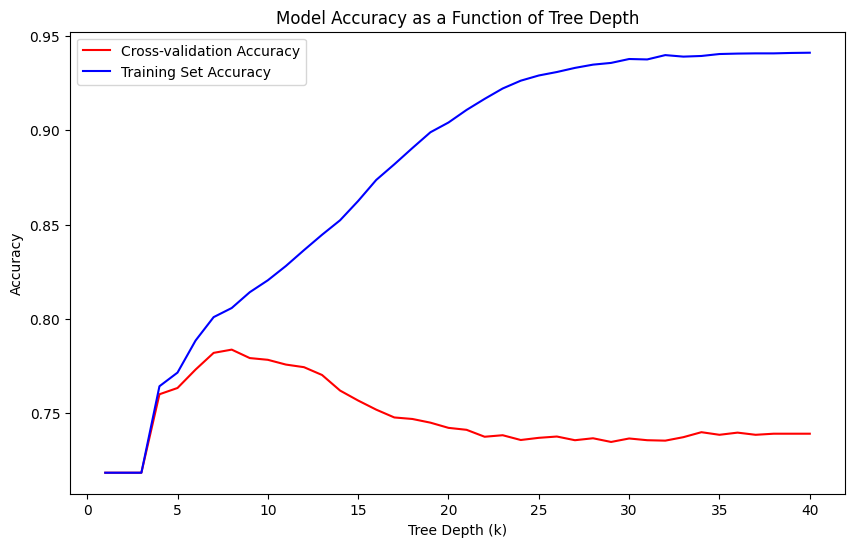

In [9]:
import matplotlib.pyplot as plt

# Plot both 'cv' and 'train' accuracies against 'k'
plt.figure(figsize=(10, 6))
plt.plot(accuracy_dt_df['k'], accuracy_dt_df['cv'], color='red', label='Cross-validation Accuracy')
plt.plot(accuracy_dt_df['k'], accuracy_dt_df['train'], color='blue', label='Training Set Accuracy')

# Adding titles and labels
plt.title('Model Accuracy as a Function of Tree Depth')
plt.xlabel('Tree Depth (k)')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.show()

# Evaluation on Kaggle

We will now publish on kaggle our tree with the most optimal depth, i.e. k=8.

In [10]:
test = pd.read_csv("Data/test.csv", index_col= "PassengerId")
X_test = test

# Best mode model with k = 8
hyperparams = {
        'criterion': 'entropy',   # Function to measure the quality of a split
        'max_depth': 8,           # 8 as the max_depth to prevent overfitting
        'random_state': 42        # Ensures reproducibility of the results
    }

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(**hyperparams))
    ])

model_pipeline.fit(X, y)
y_pred = model_pipeline.predict(X_test)

# Writing the submission DataFrame to a CSV file
kaggle_submission = pd.DataFrame(y_pred, columns=['Transported'], index=X_test.index)
#kaggle_submission.to_csv("Data/optimal_decision_tree.csv", index=True)

# What about Random Forests & Gradient Boosting?

How much do they overfit?

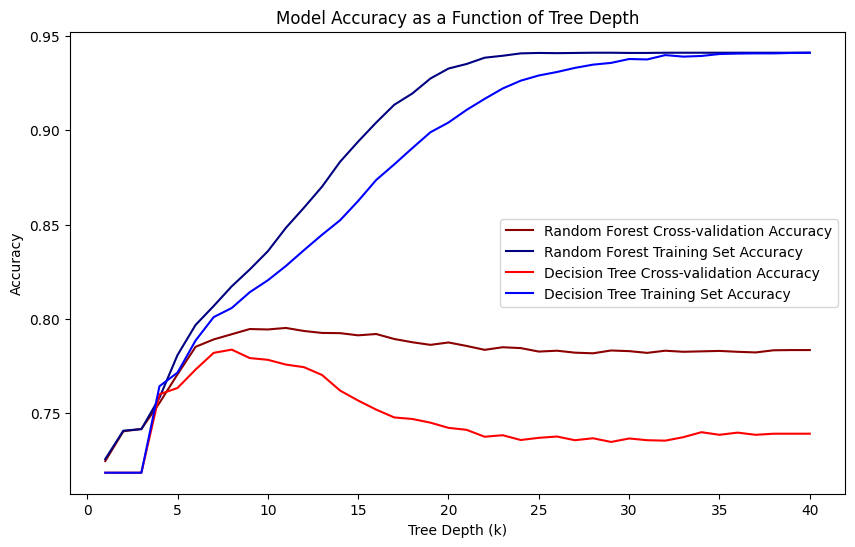

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

X = train.drop('Transported', axis=1)
y = train['Transported']

# Initialize a list to store results
results = []

for k in range(1, 41):  # Iterating from 1 to 40
    hyperparams = {
        'max_depth': k,           # k as the max_depth to prevent overfitting
        'random_state': 42,       # Ensures reproducibility of the results
        'n_jobs': -1              # Use all available cores of the CPU
    }

    # Update the model pipeline with the new DecisionTreeClassifier parameters
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(**hyperparams))
    ])
    
    # Compute accuracy using 5-fold cross-validation
    cross_val = cross_val_score(model_pipeline, X, y, cv=5, scoring='accuracy', n_jobs=-1).mean()

    # /!\ THIS IS NOT SOMETHING YOU SHOULD DO IRL /!\
    model_pipeline.fit(X, y)
    accuracy = model_pipeline.score(X, y)

    # Append the results to the list
    results.append({'k': k, 'cv': cross_val, 'train': accuracy})

# Create the DataFrame from the results list
accuracy_rf_df = pd.DataFrame(results)

# Plot both 'cv' and 'train' accuracies against 'k'
plt.figure(figsize=(10, 6))
plt.plot(accuracy_rf_df['k'], accuracy_rf_df['cv'], color='darkred', label='Random Forest Cross-validation Accuracy')
plt.plot(accuracy_rf_df['k'], accuracy_rf_df['train'], color='navy', label='Random Forest Training Set Accuracy')
plt.plot(accuracy_dt_df['k'], accuracy_dt_df['cv'], color='red', label='Decision Tree Cross-validation Accuracy')
plt.plot(accuracy_dt_df['k'], accuracy_dt_df['train'], color='blue', label='Decision Tree Training Set Accuracy')

# Adding titles and labels
plt.title('Model Accuracy as a Function of Tree Depth')
plt.xlabel('Tree Depth (k)')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.show()